In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc  


# PART A: DATA PREPROCESSING

In [2]:
# load data 
data = pd.read_csv("diabetes.csv") 
df = data.copy() 

In [3]:
# first 5 rows 
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check for missing values 
df.isnull().sum() 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# describe  the table 
df.describe() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# features and target
X = df.drop('Outcome', axis=1) 
y = df['Outcome'] 

print(X.shape, y.shape) 


(768, 8) (768,)


In [7]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(537, 8) (231, 8) (537,) (231,)


In [8]:
# scale the data 
 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 

print(X_train.shape, X_test.shape)  

(537, 8) (231, 8)


# PART B: LOGISTIC REGRESSION

In [9]:
# train the model 
clf = LogisticRegression(solver="liblinear",random_state=42, max_iter=1000,class_weight="balanced") 
clf.fit(X_train, y_train) 
  

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
# predict on test set 
y_pred = clf.predict(X_test)


Accuracy: 0.7662337662337663
Confusion Matrix:
[[119  31]
 [ 23  58]]
Precision: 0.651685393258427
Recall: 0.7160493827160493
F1-score: 0.6823529411764706


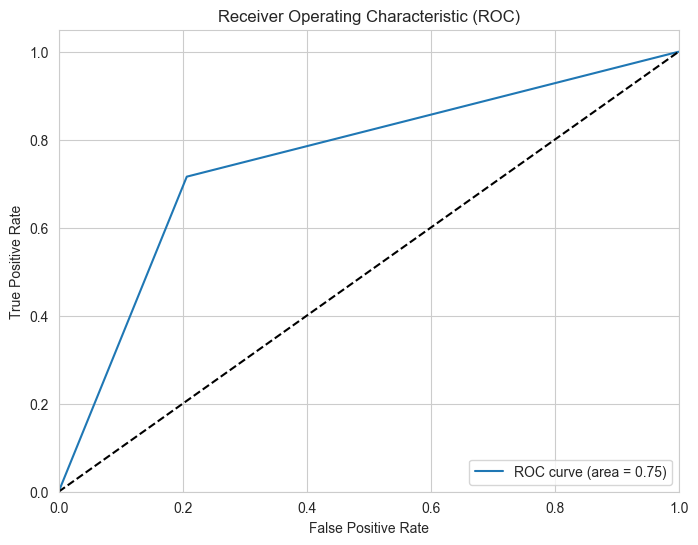

ROC AUC Score: 0.7546913580246914


In [11]:
# accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy}") 


# confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
print(f"Confusion Matrix:\n{cm}") 


# precision, recall, f1-score 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 


print(f"Precision: {precision}") 
print(f"Recall: {recall}") 
print(f"F1-score: {f1}") 


# roc curve and auc score 
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr) 

sns.set_style("whitegrid") 
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC)') 
plt.legend(loc="lower right") 
plt.show()


print(f"ROC AUC Score: {roc_auc}") 

# Guiding Question: 

Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?

AUC-ROC is a better evaluation metric than just accuracy in imbalanced datasets because it takes into account the true positive rate (TPR) and the false positive rate (FPR) of the model. Accuracy is simply the number of correct predictions divided by the total number of predictions. In an imbalanced dataset, accuracy can be misleading because a model that always predicts the majority class will have a high accuracy but will not be able to correctly identify the minority class. AUC-ROC, on the other hand, is not affected by the class distribution and can provide a more accurate assessment of the model's performance.

# PART C: DECISION TREE CLASSIFIER

In [12]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 

# train the model 
dt = DecisionTreeClassifier(max_depth=4, random_state=42) 
dt.fit(X_train, y_train) 



,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:

# predict on test set 
y_pred = dt.predict(X_test) 

Accuracy: 0.7662337662337663
Precision: 0.6901408450704225
Recall: 0.6049382716049383
F1-score: 0.6447368421052632
Confusion Matrix:
[[128  22]
 [ 32  49]]


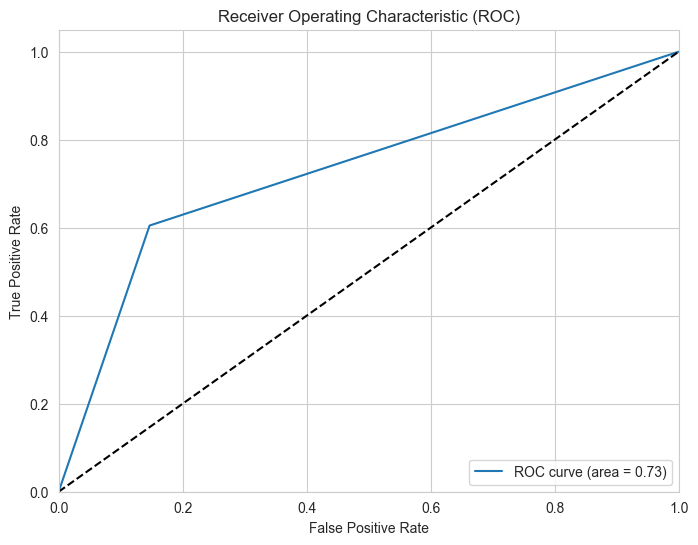

ROC AUC Score: 0.7291358024691358


In [14]:
# accuracy 
accuracy_dt = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy_dt}") 

# precision, recall, f1-score 
precision_dt = precision_score(y_test, y_pred) 
recall_dt = recall_score(y_test, y_pred) 
f1_dt = f1_score(y_test, y_pred) 

print(f"Precision: {precision_dt}") 
print(f"Recall: {recall_dt}") 
print(f"F1-score: {f1_dt}") 


# confusion matrix 
cm_dt = confusion_matrix(y_test, y_pred) 
print(f"Confusion Matrix:\n{cm_dt}") 

# roc curve and auc score 
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc_dt = auc(fpr, tpr) 

sns.set_style("whitegrid") 
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC)') 
plt.legend(loc="lower right") 
plt.show()


print(f"ROC AUC Score: {roc_auc_dt}") 


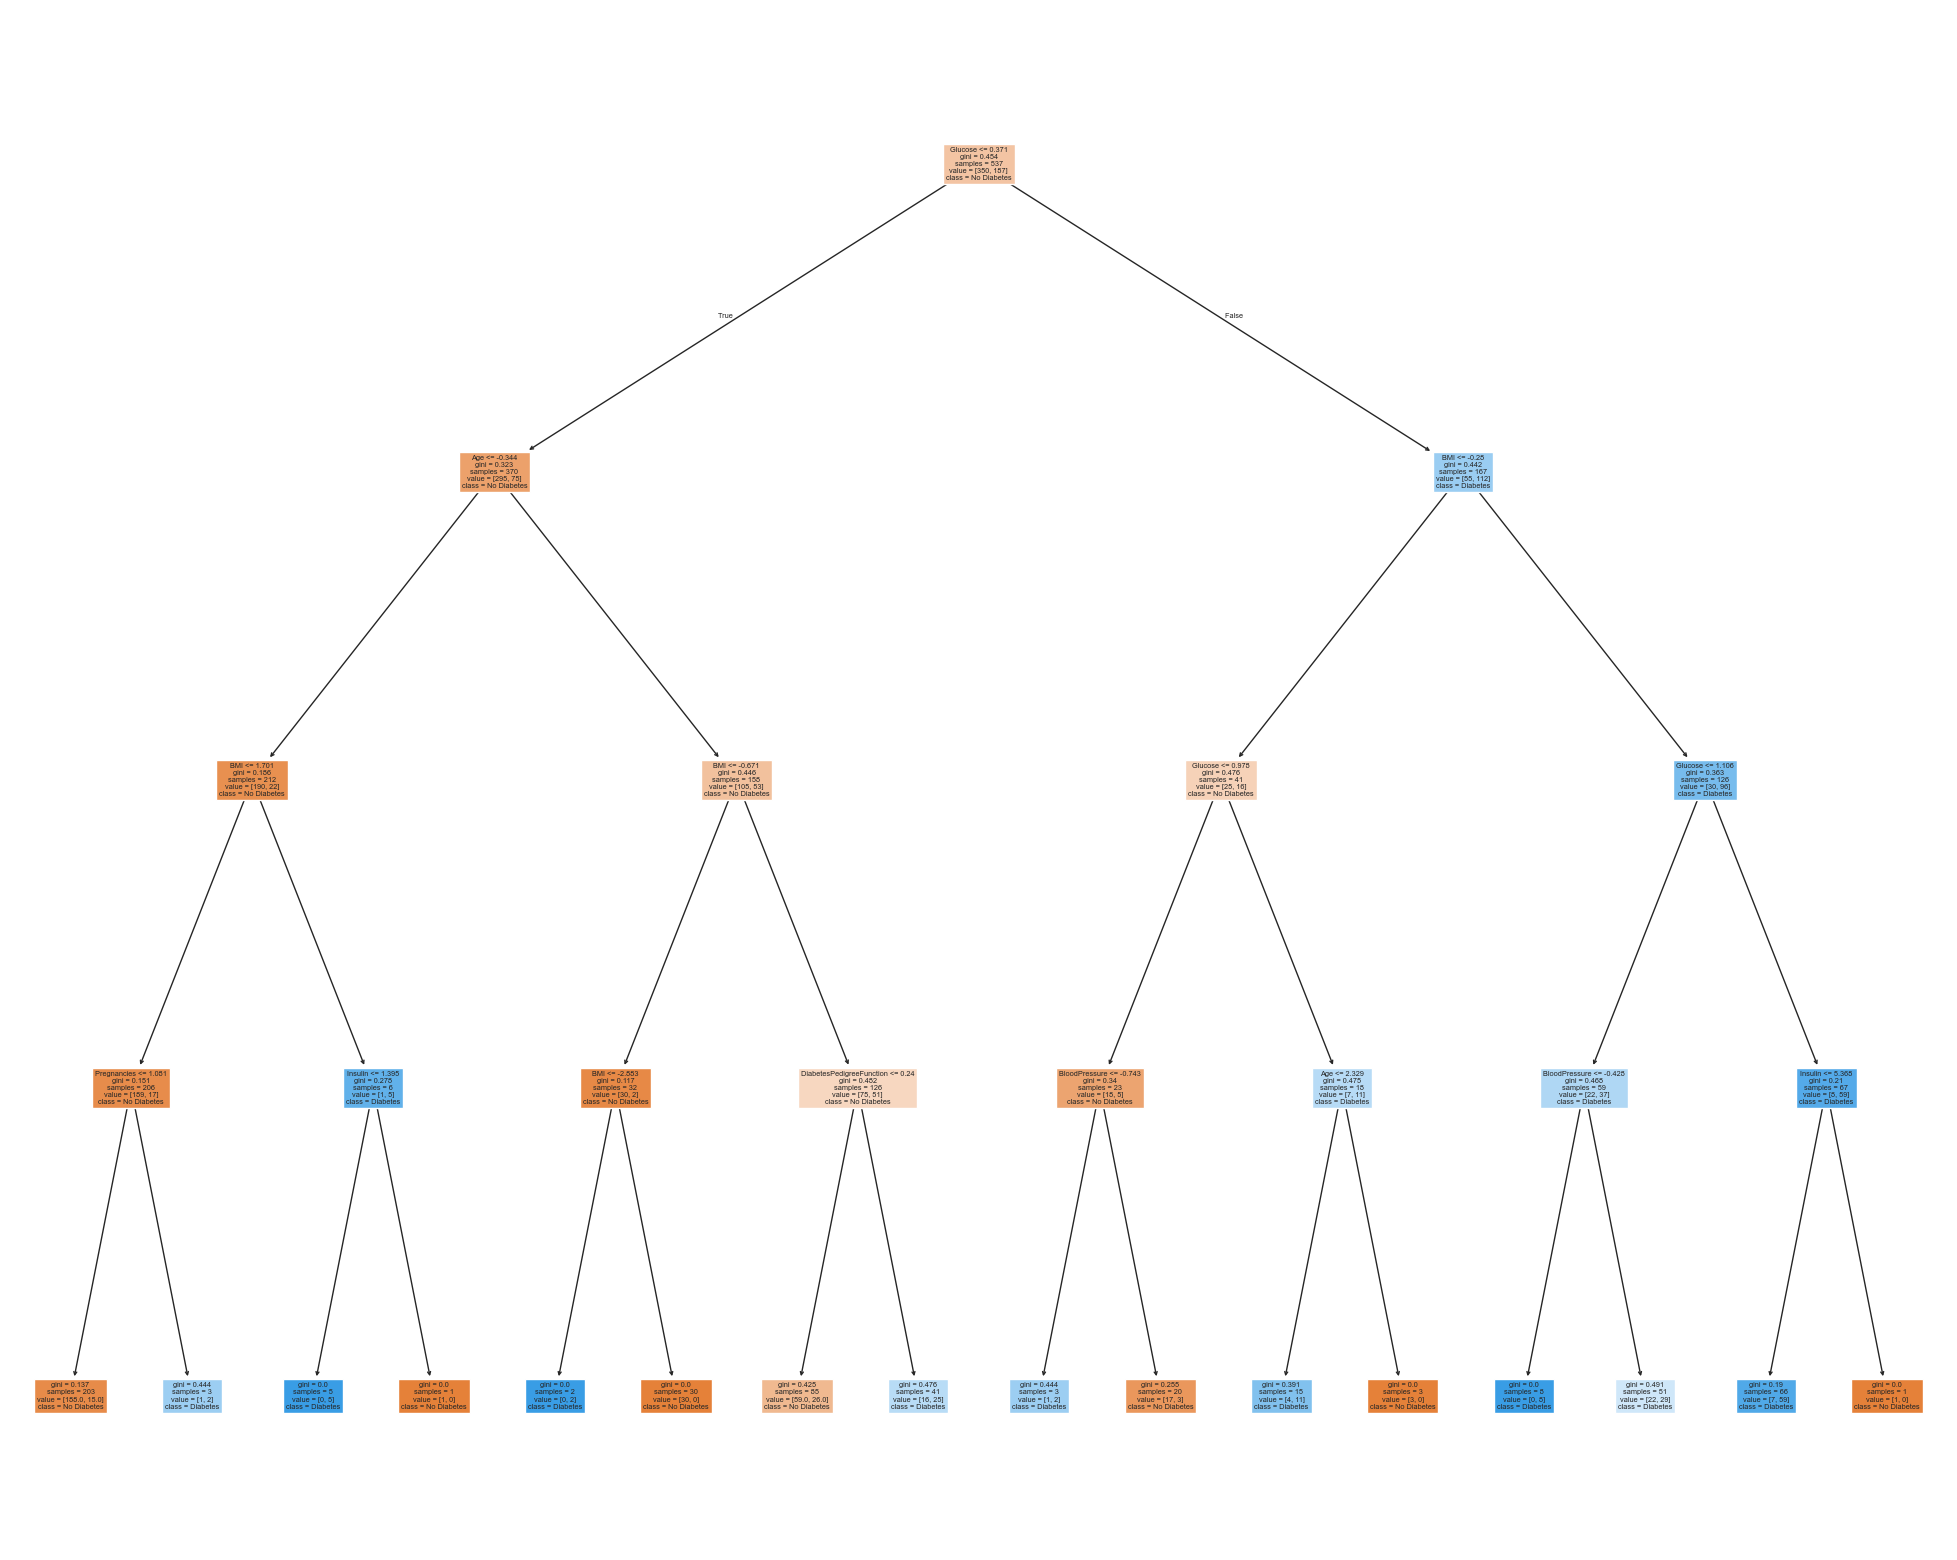

In [ ]:
# plot the tree 
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(dt, 
                   feature_names=X.columns,  
                   class_names=['No Diabetes', 'Diabetes'], 
                   filled=True) 

# Interpret the first split (which feature did it choose and why?)

The first split is based on the 'Glucose' feature. The decision tree is checking if the glucose level is less than or equal to 126.5. If true, it goes to the left branch; otherwise, it goes to the right branch. This split is chosen because it provides the best separation between the two classes at the current node. glucose and outcome has a hight corr of 0.47


# Guiding Question:

1. Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

    Decision Tree is easier to interpret for doctors because it provides a clear and intuitive way to understand the decision-making process. Doctors can easily follow the splits and understand the criteria used to make a decision. On the other hand, Logistic Regression's coefficients provide a more abstract view of the relationship between the features and the target variable. While they can be used to understand the relative importance of each feature, they are less intuitive for doctors to interpret.


2. Which one would you prefer in a medical diagnosis scenario? Why?

    I would prefer logistic regression because it provides a more accurate and reliable prediction of the target variable. While decision trees are easier to interpret, they are more prone to overfitting and may not generalize well to new data. Logistic regression, on the other hand, provides a more robust and reliable model for medical diagnosis.


# PART D: COMPARISON & REFLECTION

In [16]:
# compare regression and decision tree metrics in a table
metrics = pd.DataFrame({'Logistic Regression': [accuracy, precision, recall, f1, roc_auc],
                       'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]},
                      index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

display(metrics)

,Logistic Regression,Decision Tree
Accuracy,0.766234,0.766234
Precision,0.651685,0.690141
Recall,0.716049,0.604938
F1-score,0.682353,0.644737
ROC AUC,0.754691,0.729136


1. Which model performs better?

    The Logistic Regression model performs better than the Decision Tree model based on the evaluation metrics. The Logistic Regression model has a higher   recall, F1-score, and AUC score than the Decision Tree model.

2. Which model is easier to interpret for doctors?

    The Decision Tree model is easier to interpret for doctors because it provides a clear set of rules that can be easily understood. The Logistic Regression model, on the other hand, provides a set of coefficients that can be difficult to interpret.

3. If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?

    If the dataset is slightly imbalanced, recall should be prioritized in diagnosing diabetes. This is because false negatives (predicting a patient does not have diabetes when they actually do) can have serious consequences, such as delayed treatment. Therefore, it is important to minimize the number of false negatives, even if it means accepting a higher number of false positives (predicting a patient has diabetes when they actually do not).


# Comparision

In this dataset, we have two models, logistic regression and decision tree. We will compare the performance of these two models.
First, we will compare the accuracy of these two models. Then, we will compare the precision, recall, f1-score, and roc auc score of these two models.
As we can see from the table , the accuracy of the decision tree is same as the logistic regression and precision of the decision tree is higher than the logistic regression. However, the  recall, f1-score, and roc auc score of the logistic regression is higher than the decision tree. Therefore, we can conclude that the logistic regression is better than the decision tree for this dataset.